In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
%matplotlib inline
sns.set()

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Loding

In [ ]:
!wget https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt

--2021-01-06 13:08:24--  https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt
Resolving www4.stat.ncsu.edu (www4.stat.ncsu.edu)... 152.1.62.52
Connecting to www4.stat.ncsu.edu (www4.stat.ncsu.edu)|152.1.62.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18496 (18K) [text/plain]
Saving to: ‘diabetes.tab.txt’

diabetes.tab.txt    100%[===================>]  18.06K  --.-KB/s    in 0.02s   

2021-01-06 13:08:25 (895 KB/s) - ‘diabetes.tab.txt’ saved [18496/18496]



In [ ]:
!ls

diabetes.tab.txt  sample_data


Source URL: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

    Additional Information about the features
        age : age in years
        sex :
        bmi : body mass index
        bp  : average blood pressure
        s1  : tc, T-Cells (a type of white blood cells)
        s2  : ldl, low-density lipoproteins
        s3  : hdl, high-density lipoproteins
        s4  : tch, thyroid stimulating hormone
        s5  : ltg, lamotrigine
        s6  : glu, blood sugar level

In [ ]:
df = pd.read_csv('diabetes.tab.txt',sep='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [ ]:
df.isnull().sum(axis=0)

AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [ ]:
df.describe().drop(['SEX','Y'],axis=1)

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


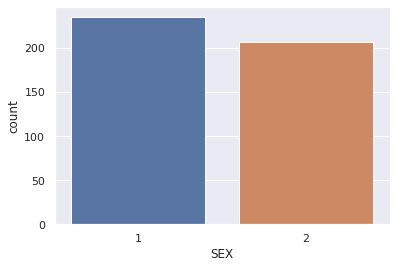

In [ ]:
sns.countplot('SEX',data=df);

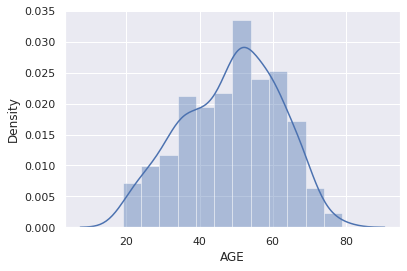

In [ ]:
sns.distplot(df['AGE']);

                               Histogram for all the Neumerical Feafures


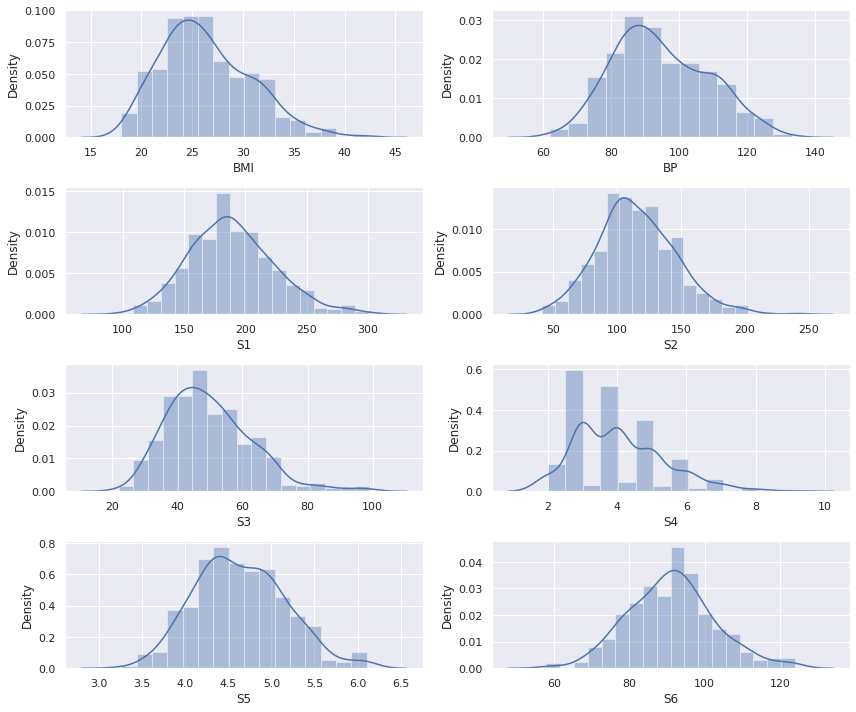

In [ ]:
cols = ['BMI','BP','S1','S2','S3','S4','S5','S6']
nrows = 4
ncols = 2
fig, axes = plt.subplots(4, 2, figsize=(12, 10))
index = 0
for row in range(nrows):
    for col in range(ncols):
        sns.distplot(df[cols[index]], ax=axes[row,col])
        index += 1
fig.tight_layout()
print(' '*30,'Histogram for all the Neumerical Feafures')
plt.show();

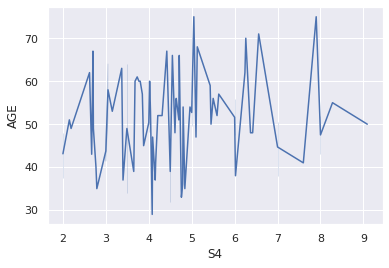

In [ ]:
sns.lineplot(data=df,y='AGE',x='S4')

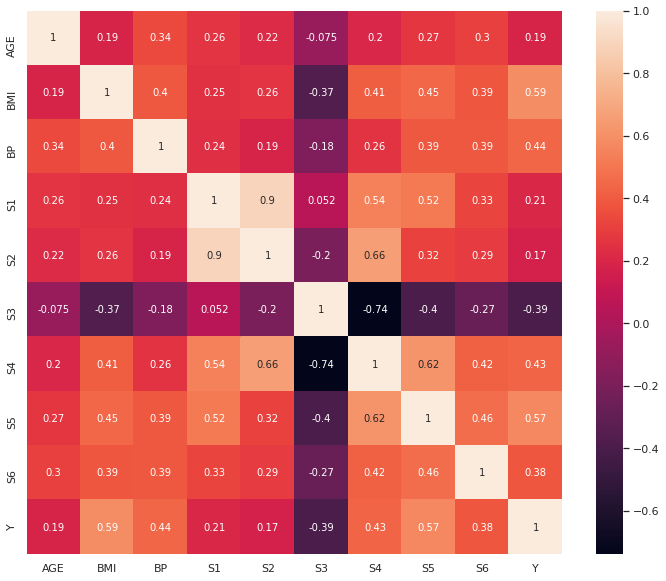

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.drop(['SEX'],axis=1).corr(),annot=True);

In [ ]:
# changing SEX to categorical feature.
df['SEX'] = df['SEX'].astype('str')
df = pd.concat([df,pd.get_dummies(df['SEX'])],axis=1)

In [ ]:
df.drop(['SEX'],axis=1,inplace=True)

### Observations
* SEX column is of dtype int64, we need to change that to categorical variable.
* As I excatly don't know which value represent the male and female, so it would be easy to do one-hot encoding the model .
* s4  : tch, thyroid stimulating hormone shows some irregularities as compare to the other features.
* Feature S1 and S2 are highly corellated with each other.

In [ ]:
df.head()

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,Y,1,2
0,59,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151,0,1
1,48,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75,1,0
2,72,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141,0,1
3,24,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206,1,0
4,50,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135,1,0


## Modeling

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Y'],axis=1).values, df['Y'].values, test_size=0.2)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 11) (353,)
(89, 11) (89,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_train)
print("Mean Squared Error on Training Data = ",mean_squared_error(y_train, y_pred))
y_pred1 = lr.predict(X_test)
print("Mean Squared Error on Testing Data = ",mean_squared_error(y_test, y_pred1))

Mean Squared Error on Training Data =  2919.489189622684
Mean Squared Error on Testing Data =  2686.9614998088423


In [ ]:
from sklearn.linear_model import Ridge
alphas = [0.01, 0.1, 1, 10, 100]
train_error = []
cv_error = []
for alpha in alphas:
    rg = Ridge(alpha = alpha)
    rg.fit(X_train, y_train)
    y_pred = rg.predict(X_train)
    train_error.append(mean_squared_error(y_train, y_pred))
    y_pred1 = rg.predict(X_test)
    cv_error.append(mean_squared_error(y_test, y_pred1))

In [ ]:
print("Minimum teting error is = ",min(cv_error))
print("Best value for alpha is = ",alphas[cv_error.index(min(cv_error))])

Minimum teting error is =  2683.460776694342
Best value for alpha is =  1


In [ ]:
from sklearn.svm import SVR
C = [1,5,10,100]
test_error = []
train_error = []
best_c = None 
least_error = 9999999
best_model = None 
for c in C:
    svr = SVR(C=c)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_train)
    train_error.append(mean_squared_error(y_train, y_pred))
    y_pred1 = svr.predict(X_test)
    test_e = mean_squared_error(y_test, y_pred1)
    test_error.append(test_e)
    if test_e < least_error:
        least_error = test_e 
        best_c = c 
        best_model = svr
print("Minimum Testing error = ", least_error)
print("Best value for C= ",best_c)

Minimum Testing error =  3511.170879778455
Best value for C=  100


In [ ]:
C = [5000,10000,20000]
test_error = []
train_error = []
best_c = None 
least_error = 9999999
best_model = None 
for c in C:
    svr = SVR(C=c)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_train)
    train_error.append(mean_squared_error(y_train, y_pred))
    y_pred1 = svr.predict(X_test)
    test_e = mean_squared_error(y_test, y_pred1)
    test_error.append(test_e)
    if test_e < least_error:
        least_error = test_e 
        best_c = c 
        best_model = svr
print("Minimum Testing error = ", least_error)
print("Best value for C= ",best_c)

Minimum Testing error =  2597.1265991073433
Best value for C=  5000


In [ ]:
C = [1,10,100,1000]
test_error = []
train_error = []
best_c = None 
least_error = 9999999
best_model = None 
for c in C:
    svr = SVR(C=c, kernel='linear')
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_train)
    train_error.append(mean_squared_error(y_train, y_pred))
    y_pred1 = svr.predict(X_test)
    test_e = mean_squared_error(y_test, y_pred1)
    test_error.append(test_e)
    if test_e < least_error:
        least_error = test_e 
        best_c = c 
        best_model = svr
print("Minimum Testing error = ", least_error)
print("Best value for C= ",best_c)

Minimum Testing error =  2680.0698239849603
Best value for C=  100


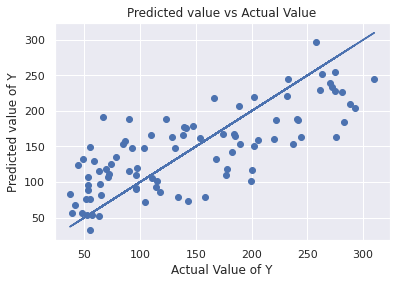

In [ ]:
y_pred1 = best_model.predict(X_test)
plt.scatter(y_test, y_pred1)
plt.plot(y_test, y_test)
plt.title('Predicted value vs Actual Value')
plt.xlabel('Actual Value of Y')
plt.ylabel('Predicted value of Y')
plt.show()

In [ ]:
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(df.drop(['S1','Y'],axis=1).values, df['Y'].values, test_size=0.2)

In [ ]:
print(X_train_temp.shape, y_train_temp.shape)
print(X_test_temp.shape, y_test_temp.shape)

(353, 10) (353,)
(89, 10) (89,)


In [ ]:
svr = SVR(C=100, kernel='linear')
svr.fit(X_train_temp, y_train_temp)
y_pred = svr.predict(X_train_temp)
y_pred1 = svr.predict(X_test_temp)
print("Training Error = ", mean_squared_error(y_train_temp, y_pred))
print("Testing Error = ",mean_squared_error(y_test_temp, y_pred1))

Training Error =  2847.925873245708
Testing Error =  3187.987974093214


## After Standardization of data 

In [ ]:
!ls

diabetes.tab.txt  sample_data


In [ ]:
df = pd.read_csv('diabetes.tab.txt', sep='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [ ]:
df['SEX'] = df['SEX'].astype('str')
df = pd.concat([df.drop(['SEX'],axis=1), pd.get_dummies(df['SEX'])], axis=1)

In [ ]:
df.head()

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,Y,1,2
0,59,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151,0,1
1,48,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75,1,0
2,72,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141,0,1
3,24,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206,1,0
4,50,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Y'], axis=1), df['Y'], test_size=0.2)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 11) (353,)
(89, 11) (89,)


In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[['AGE','BMI','BP','S1','S2','S3','S4','S5','S6']].values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train[['AGE','BMI','BP','S1','S2','S3','S4','S5','S6']] = scaler.transform(X_train[['AGE','BMI','BP','S1','S2','S3','S4','S5','S6']])
X_test[['AGE','BMI','BP','S1','S2','S3','S4','S5','S6']] = scaler.transform(X_test[['AGE','BMI','BP','S1','S2','S3','S4','S5','S6']])

In [ ]:
X_train.head()

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,1,2
6,-0.891352,-1.002406,-0.317892,-0.837618,-0.531132,0.046167,-0.847614,-1.312106,-0.774516,0,1
5,-1.882968,-0.863596,-0.391590,-1.455517,-1.721194,0.924926,-1.633329,-0.857592,-1.985800,1,0
207,0.252820,0.987201,0.640179,0.280484,-0.291751,0.605378,-0.847614,0.967706,0.782849,1,0
19,-0.509961,-0.377762,-0.833776,-0.043177,-0.237036,0.845039,-0.847614,-0.183730,-1.120597,1,0
270,0.176542,0.663311,1.819343,-0.778771,-1.023571,0.365716,-0.847614,0.183884,0.350248,0,1


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [ ]:
lr = LinearRegression()
lr.fit(X_train.values, y_train.values)
y_pred = lr.predict(X_train.values)
print("Training Error with std. data = ", mean_squared_error(y_train, y_pred))
y_pred1 = lr.predict(X_test.values)
print("Testing Error with std data = ", mean_squared_error(y_test, y_pred1))

Training Error with std. data =  2816.680995322364
Testing Error with std data =  3138.069488901397


In [ ]:
from sklearn.svm import SVR
C = [1,5,10,100]
test_error = []
train_error = []
best_c = None 
least_error = 9999999
best_model = None 
for c in C:
    svr = SVR(C=c)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_train)
    train_error.append(mean_squared_error(y_train, y_pred))
    y_pred1 = svr.predict(X_test)
    test_e = mean_squared_error(y_test, y_pred1)
    test_error.append(test_e)
    if test_e < least_error:
        least_error = test_e 
        best_c = c 
        best_model = svr
print("Minimum Testing error = ", least_error)
print("Best value for C= ",best_c)

Minimum Testing error =  3218.9508136077884
Best value for C=  10


In [ ]:
alphas = [0.01, 0.1, 1, 10, 100]
train_error = []
cv_error = []
best_alpha = None 
least_error = 9999999
best_model = None
for alpha in alphas:
    rg = Ridge(alpha = alpha)
    rg.fit(X_train, y_train)
    y_pred = rg.predict(X_train)
    train_error.append(mean_squared_error(y_train, y_pred))
    y_pred1 = rg.predict(X_test)
    cv_er = mean_squared_error(y_test, y_pred1)
    cv_error.append(cv_er)
    if cv_er < least_error:
        least_error = cv_er
        best_model = rg 
        best_alpha = alpha 
print("Minimum Testing Error = ",least_error)
print("best alpha = ",best_alpha)

Minimum Testing Error =  3125.2949736585156
best alpha =  10


### Trying Some Non-linear Models

In [ ]:
!ls

diabetes.tab.txt  sample_data


In [ ]:
df = pd.read_csv('diabetes.tab.txt',sep='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [ ]:
df['SEX'] = df['SEX'].astype('str')
df = pd.concat([df.drop(['SEX'],axis=1), pd.get_dummies(df['SEX'])], axis=1)

In [ ]:
df.head()

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,Y,1,2
0,59,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151,0,1
1,48,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75,1,0
2,72,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141,0,1
3,24,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206,1,0
4,50,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Y'],axis=1).values, df['Y'].values, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 11) (353,)
(89, 11) (89,)


In [ ]:
best_model = None 
best_depth = None
least_error = 9999999
max_depths = [3,4,5,6] 
train_errors = []
test_errors = []
for d in max_depths:
    tr = DecisionTreeRegressor(max_depth=d)
    tr.fit(X_train, y_train)
    y_pred = tr.predict(X_train)
    train_errors.append(mean_squared_error(y_train, y_pred))
    y_pred1 = tr.predict(X_test)
    test_er = mean_squared_error(y_test, y_pred1)
    if test_er < least_error:
        least_error = test_er
        best_model = tr
        best_depth = d
print("Minimum testing error = " ,least_error)
print("Best Max Depth = ",best_depth)

Minimum testing error =  4119.321566362705
Best Max Depth =  3


In [ ]:
best_model = None 
best_depth = None
least_error = 9999999
max_depths = [3,4,5,6,7,8,9]
num_estimators = [100,300,500]
train_errors = []
test_errors = []
for est in num_estimators:
    for d in max_depths:
        tr = RandomForestRegressor(n_estimators=est, max_depth=d, n_jobs=-1)
        tr.fit(X_train, y_train)
        y_pred = tr.predict(X_train)
        train_errors.append(mean_squared_error(y_train, y_pred))
        y_pred1 = tr.predict(X_test)
        test_er = mean_squared_error(y_test, y_pred1)
        if test_er < least_error:
            least_error = test_er
            best_model = tr
            best_depth = d
print("Minimum testing error = " ,least_error)
print("Best Max Depth = ",best_depth)

Minimum testing error =  3302.6145561369085
Best Max Depth =  3
